In [1]:
# 단순보 + 등분포하중(w)
w = 5.0   # kN/m
L = 6.0   # m

RA = w * L / 2
RB = w * L / 2

print(f"w={w} kN/m, L={L} m")
print(f"RA=RB={RA:.3f} kN")


w=5.0 kN/m, L=6.0 m
RA=RB=15.000 kN


In [2]:
n = 400
x_list, V_list, M_list = [], [], []

M_max = -1e30
x_Mmax = 0.0

for i in range(n + 1):
    x = L * i / n
    x_list.append(x)

    # 전단력: V(x) = RA - w*x
    V = RA - w * x
    V_list.append(V)

    # 모멘트: M(x) = RA*x - w*x^2/2
    M = RA * x - w * x**2 / 2
    M_list.append(M)

    if M > M_max:
        M_max = M
        x_Mmax = x

print(f"Mmax ≈ {M_max:.3f} kN·m at x ≈ {x_Mmax:.3f} m")


Mmax ≈ 22.500 kN·m at x ≈ 3.000 m


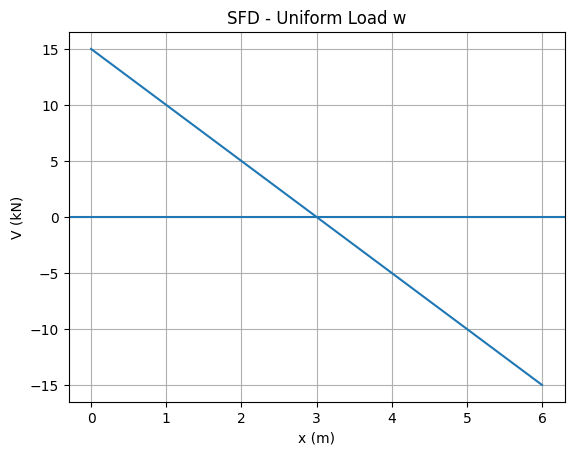

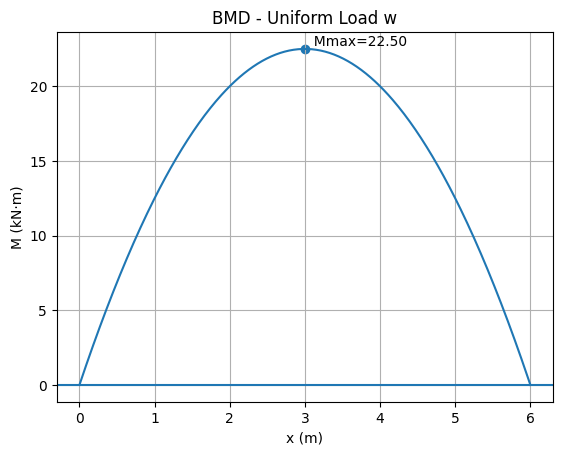

In [3]:
import matplotlib.pyplot as plt

# SFD
plt.figure()
plt.plot(x_list, V_list)
plt.axhline(0)
plt.title("SFD - Uniform Load w")
plt.xlabel("x (m)")
plt.ylabel("V (kN)")
plt.grid(True)

# BMD
plt.figure()
plt.plot(x_list, M_list)
plt.axhline(0)
plt.title("BMD - Uniform Load w")
plt.xlabel("x (m)")
plt.ylabel("M (kN·m)")
plt.grid(True)

plt.scatter([x_Mmax], [M_max])
plt.text(x_Mmax, M_max, f"  Mmax={M_max:.2f}", va="bottom")

plt.show()


In [4]:
from pathlib import Path
Path("images").mkdir(exist_ok=True)
print("images/ 폴더 준비 완료")

images/ 폴더 준비 완료


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime

tag = "pointload_at_a"   # 파일 이름 구분용 (원하는 이름으로 바꿔도 됨)
ts = datetime.now().strftime("%Y%m%d-%H%M%S")

# --- SFD ---
fig1 = plt.figure()
plt.plot(x_list, V_list)
plt.axhline(0)
plt.title("SFD")
plt.xlabel("x (m)")
plt.ylabel("V (kN)")
plt.grid(True)

sfd_path = f"images/{ts}_{tag}_SFD.png"
fig1.savefig(sfd_path, dpi=200, bbox_inches="tight")

# --- BMD ---
fig2 = plt.figure()
plt.plot(x_list, M_list)
plt.axhline(0)
plt.title("BMD")
plt.xlabel("x (m)")
plt.ylabel("M (kN·m)")
plt.grid(True)

# 최대 모멘트 표시 변수가 있을 때만 (없으면 아래 2줄 지워도 됨)
try:
    plt.scatter([x_Mmax], [M_max])
    plt.text(x_Mmax, M_max, f"  Mmax={M_max:.2f}", va="bottom")
except NameError:
    pass

bmd_path = f"images/{ts}_{tag}_BMD.png"
fig2.savefig(bmd_path, dpi=200, bbox_inches="tight")

plt.show()

print("저장 완료:")
print(" -", sfd_path)
print(" -", bmd_path)
